In [3]:
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

BASE_DIR = Path.cwd()
data = np.load("../Hyperparameters/yaleExtB_data.npy")
target = np.load("../Hyperparameters/yaleExtB_target.npy")

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=1/3)

# Define and train AdaBoostClassifier with identified hyperparameters
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, max_features='log2'), 
                             n_estimators=300, learning_rate=0.05, algorithm='SAMME.R')
ada_clf.fit(x_train, y_train)

# Calculate accuracy on test set
accuracy = ada_clf.score(x_test, y_test)

print(f"Optimal Hyperparameters Experiment Result:")
print(f"Accuracy: {accuracy}")

from sklearn.metrics import classification_report
y_pred = ada_clf.predict(x_test)
print(classification_report(y_test, y_pred))

c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Optimal Hyperparameters Experiment Result:
Accuracy: 0.988
              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00        19
         3.0       1.00      1.00      1.00        19
         4.0       1.00      1.00      1.00        15
         5.0       1.00      1.00      1.00        14
         6.0       0.94      1.00      0.97        15
         7.0       0.94      1.00      0.97        16
         8.0       1.00      1.00      1.00        14
         9.0       0.86      1.00      0.92        12
        11.0       1.00      0.89      0.94        18
        12.0       1.00      1.00      1.00        19
        13.0       1.00      1.00      1.00        16
        15.0       1.00      1.00      1.00        20
        16.0       1.00      0.90      0.95        20
        17.0       1.00      0.94      0.97        18
        18.0       1.00      1.00      1.00        14
        20.0       1.00      1.00      1.00        19
        22.0       1.0

c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\buzzr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

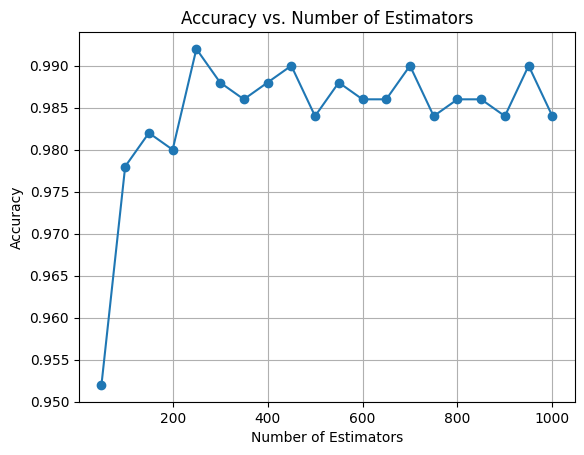

In [4]:
import matplotlib.pyplot as plt

# Varying number of estimators
estimators_range = range(50, 1001, 50)
accuracies = []

for n_estimators in estimators_range:
    ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, max_features='log2'), 
                                 n_estimators=n_estimators, learning_rate=0.05, algorithm='SAMME.R')
    ada_clf.fit(x_train, y_train)
    accuracy = ada_clf.score(x_test, y_test)
    accuracies.append(accuracy)

# Plotting the accuracy graph
plt.plot(estimators_range, accuracies, marker='o')
plt.title('Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()